In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns

In [13]:
df = pd.read_csv('../data/National_Greenhouse_Gas_Emissions_Inventories_and_Targets.csv')
df['ISO2'] = df['ISO2'].replace(np.nan, 'ZZ')
df = df.drop(columns=['ObjectId', "ISO3", "Indicator", "Unit", "Source", "CTS_Name", "CTS_Full_Descriptor", "Scale", 'F2022', 'F2023', 'F2024', 'F2025',
       'F2026', 'F2027', 'F2028', 'F2029', 'F2030'])
df = df[df['Gas_Type'].isin(["Carbon dioxide", "Greenhouse gas"])]

In [14]:
df.shape

(9103, 57)

In [15]:
df[(df['Country']=="World") & (df["Industry"]=="Energy") &(df["Gas_Type"] == "Carbon dioxide")]['F2021']

20114    34215.34431
Name: F2021, dtype: float64

In [16]:
df[(df['Country']=="World") & (df["CTS_Code"]=="ECNGDE") &(df["Gas_Type"] == "Greenhouse gas")]['F2021']

20201    51402.52318
Name: F2021, dtype: float64

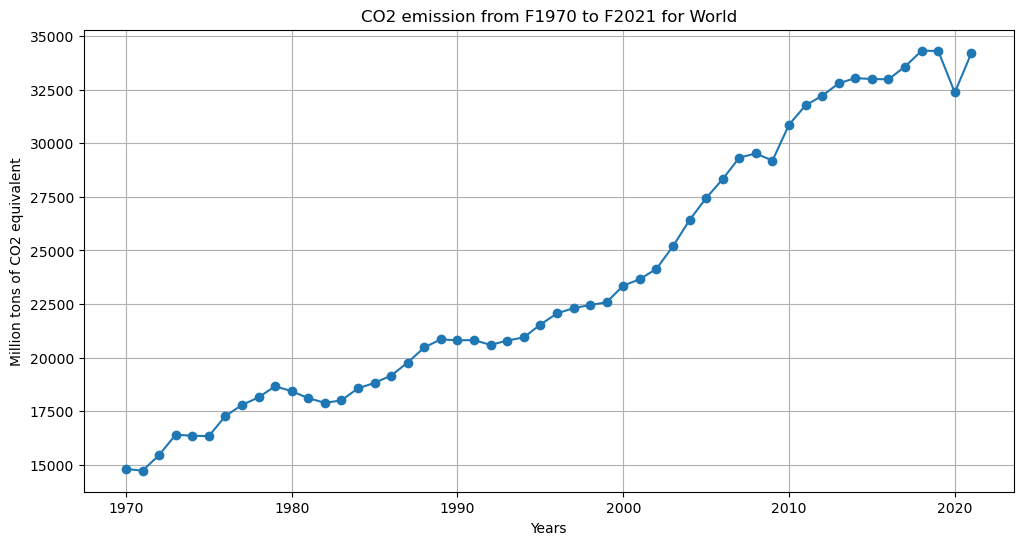

In [17]:
years = [int(x[1:]) for x in df.columns[5:].to_list()]
country = "World"
row = df[(df['Country']==country) & (df["Industry"]=="Energy") &(df["Gas_Type"] == "Carbon dioxide")]
values = row.iloc[0, 5:].astype(float)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, values, marker='o', linestyle='-')
plt.title('CO2 emission from F1970 to F2021 for '+country)
plt.xlabel('Years')
plt.ylabel('Million tons of CO2 equivalent')
plt.grid(True)
plt.show()

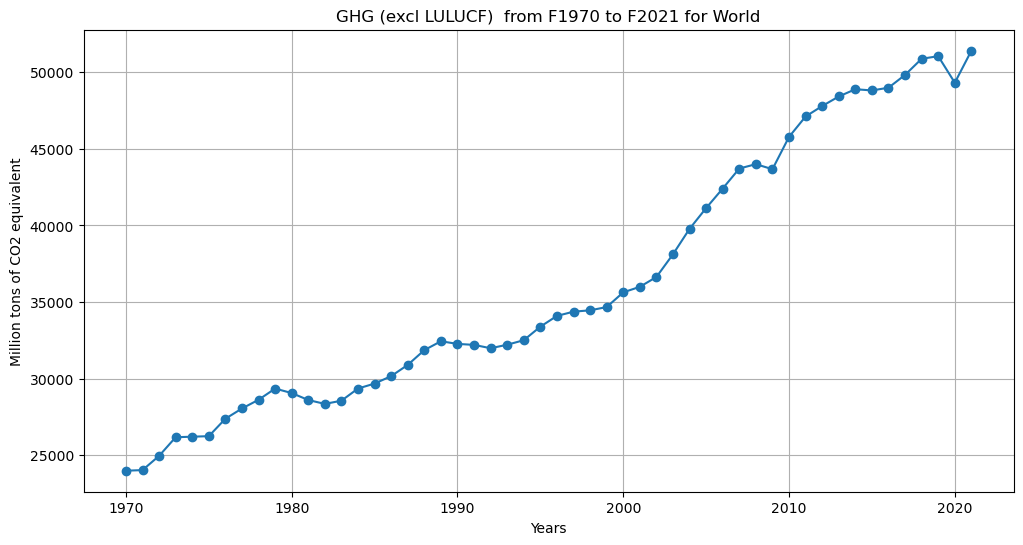

In [18]:
years = [int(x[1:]) for x in df.columns[5:].to_list()]
country = "World"
row = df[(df['Country']=="World") & (df["CTS_Code"]=="ECNGDE") &(df["Gas_Type"] == "Greenhouse gas")]
values = row.iloc[0, 5:].astype(float)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, values, marker='o', linestyle='-')
plt.title('GHG (excl LULUCF)  from F1970 to F2021 for '+country)
plt.xlabel('Years')
plt.ylabel('Million tons of CO2 equivalent')
plt.grid(True)
plt.show()

In [19]:
df[(df['Country']=="World") & (df["CTS_Code"]=="ECNGDE") &(df["Gas_Type"] == "Greenhouse gas")]['F2021']

20201    51402.52318
Name: F2021, dtype: float64

In [20]:
df.head(10)

,Country,ISO2,CTS_Code,Industry,Gas_Type,F1970,F1971,F1972,F1973,F1974,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,Advanced Economies,ZZ,ECNGDR,Agriculture,Carbon dioxide,20.880609,20.901782,21.075596,21.496603,21.582896,...,25.791341,24.541533,24.839765,25.495113,25.384501,25.219571,24.679238,24.984129,25.102868,25.035774
1,Advanced Economies,ZZ,ECNGDR,Agriculture,Greenhouse gas,1033.088228,1040.842816,1047.925600,1060.981516,1079.694780,...,1116.607829,1161.170230,1173.418622,1179.377600,1167.459920,1172.242024,1180.337665,1178.929662,1148.431002,1143.352083
4,Advanced Economies,ZZ,ECNGDR,Buildings and other Sectors,Carbon dioxide,1954.799942,1966.157204,2027.906735,2043.195965,1936.555406,...,1370.820755,1456.717735,1384.945817,1392.701550,1363.344283,1368.896823,1417.215270,1414.019033,1348.438469,1384.787385
5,Advanced Economies,ZZ,ECNGDR,Buildings and other Sectors,Greenhouse gas,2021.344873,2027.309773,2085.520536,2100.021032,1992.549136,...,1399.933025,1487.569357,1413.996695,1421.939062,1391.414041,1397.201202,1446.085075,1442.810145,1375.845592,1412.660677
8,Advanced Economies,ZZ,ECNGDR,Chemical Industry,Carbon dioxide,96.097933,95.298869,102.700907,108.604969,109.820114,...,136.403178,140.894320,137.487325,144.251563,141.627654,147.149483,148.467374,149.584701,146.679753,149.489634
10,Advanced Economies,ZZ,ECNGDR,Chemical Industry,Greenhouse gas,339.342949,339.930963,349.192569,364.811088,377.513214,...,180.706853,180.885439,178.302707,183.342653,180.385873,188.357056,190.174015,186.170359,181.856993,184.935959
13,Advanced Economies,ZZ,ECNGDR,Domestic Aviation,Carbon dioxide,152.474641,157.686604,161.228552,165.738877,160.110751,...,174.189809,179.295701,178.008757,188.123414,198.129348,205.615820,208.178557,212.269544,137.232517,168.579423
14,Advanced Economies,ZZ,ECNGDR,Domestic Aviation,Greenhouse gas,153.774359,159.030445,162.602416,167.151289,161.475231,...,175.786870,180.927261,179.629372,189.833711,199.926865,207.481598,210.064127,214.197502,138.470331,170.116981
17,Advanced Economies,ZZ,ECNGDR,Domestic Navigation,Carbon dioxide,53.000663,56.428543,52.161697,54.255006,55.038725,...,71.156199,70.363176,58.722589,63.939137,71.352288,74.197541,71.536862,71.563635,61.158333,64.568267
18,Advanced Economies,ZZ,ECNGDR,Domestic Navigation,Greenhouse gas,53.538254,57.001535,52.692530,54.807444,55.598945,...,72.420233,71.628789,59.861014,65.213513,72.692010,75.569464,72.859144,72.874021,62.330750,65.802001


In [ ]:
df = pd.read_csv("../data/Annual_Surface_Temperature_Change.csv")
df['ISO2'] = df['ISO2'].replace(np.nan, 'ZZ')
df = df.drop(columns=['ObjectId', "ISO3", "Indicator", "Unit", "Source", "CTS_Code", "CTS_Name", "CTS_Full_Descriptor", 'F2022'])

In [ ]:
df.head()

,Country,ISO2,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,"Afghanistan, Islamic Rep. of",AF,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327
1,Albania,AL,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536
2,Algeria,DZ,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,...,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330
3,American Samoa,AS,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,...,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268
4,"Andorra, Principality of",AD,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,...,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533


In [ ]:
df[df["Country"].str.len()>15]

,Country,ISO2,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,"Afghanistan, Islamic Rep. of",AF,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327
4,"Andorra, Principality of",AD,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,...,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533
7,Antigua and Barbuda,AG,0.090,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,...,0.696,0.783,0.744,1.035,1.097,0.958,0.627,0.797,1.131,0.862
9,"Armenia, Rep. of",AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.247,1.407,1.283,1.931,1.356,0.889,2.772,1.859,1.954,2.087
10,"Aruba, Kingdom of the Netherlands",AW,-0.100,0.138,0.084,0.271,-0.180,0.122,-0.258,0.055,...,0.580,1.094,0.986,1.149,NaN,1.303,0.698,1.007,1.281,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,United States Virgin Islands,VI,0.069,-0.082,0.172,0.154,-0.352,-0.089,-0.307,-0.191,...,0.619,0.755,0.882,1.071,1.162,0.964,0.722,0.898,1.320,0.922
214,"Uzbekistan, Rep. of",UZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.716,1.563,0.211,1.443,2.310,1.792,1.044,1.943,1.721,1.532
216,"Venezuela, Rep. Bolivariana de",VE,0.072,-0.113,-0.012,0.097,-0.096,0.189,-0.199,-0.173,...,0.513,0.941,0.865,1.094,1.098,0.726,0.843,1.235,1.350,0.734
218,Wallis and Futuna Islands,WF,0.323,-0.051,0.125,0.187,-0.410,0.048,-0.255,-0.096,...,0.701,0.773,0.686,0.724,1.267,1.062,0.920,1.379,1.274,1.029


In [ ]:
yrdict = {}
for yr in range(1961, 2023):
    yrdict[f"F{yr}"] = yr
print(yrdict)

{'F1961': 1961, 'F1962': 1962, 'F1963': 1963, 'F1964': 1964, 'F1965': 1965, 'F1966': 1966, 'F1967': 1967, 'F1968': 1968, 'F1969': 1969, 'F1970': 1970, 'F1971': 1971, 'F1972': 1972, 'F1973': 1973, 'F1974': 1974, 'F1975': 1975, 'F1976': 1976, 'F1977': 1977, 'F1978': 1978, 'F1979': 1979, 'F1980': 1980, 'F1981': 1981, 'F1982': 1982, 'F1983': 1983, 'F1984': 1984, 'F1985': 1985, 'F1986': 1986, 'F1987': 1987, 'F1988': 1988, 'F1989': 1989, 'F1990': 1990, 'F1991': 1991, 'F1992': 1992, 'F1993': 1993, 'F1994': 1994, 'F1995': 1995, 'F1996': 1996, 'F1997': 1997, 'F1998': 1998, 'F1999': 1999, 'F2000': 2000, 'F2001': 2001, 'F2002': 2002, 'F2003': 2003, 'F2004': 2004, 'F2005': 2005, 'F2006': 2006, 'F2007': 2007, 'F2008': 2008, 'F2009': 2009, 'F2010': 2010, 'F2011': 2011, 'F2012': 2012, 'F2013': 2013, 'F2014': 2014, 'F2015': 2015, 'F2016': 2016, 'F2017': 2017, 'F2018': 2018, 'F2019': 2019, 'F2020': 2020, 'F2021': 2021, 'F2022': 2022}


In [ ]:
df = df.rename(columns=yrdict)

In [ ]:
df.head()

,Country,ISO2,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Afghanistan, Islamic Rep. of",AF,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327
1,Albania,AL,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536
2,Algeria,DZ,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,...,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330
3,American Samoa,AS,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,...,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268
4,"Andorra, Principality of",AD,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,...,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533


In [ ]:
# Pivot the DataFrame
pivot_df = df.melt(id_vars=['Country', 'ISO2'], var_name='Year', value_name='Value').pivot(index='Year', columns='Country', values='Value')

# Reset the index
pivot_df.reset_index(inplace=True)

# Display the pivoted DataFrame


/var/folders/hz/f8ktsdk14f9g74zt73qsy2300000gn/T/ipykernel_14260/1485040979.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_df = df.melt(id_vars=['Country', 'ISO2'], var_name='Year', value_name='Value').pivot(index='Year', columns='Country', values='Value')


In [ ]:
pivot_df[['Year', "Albania", "Vietnam"]].head(10)

Country,Year,Albania,Vietnam
0,1961,0.627,0.014
1,1962,0.326,-0.240
2,1963,0.075,-0.302
3,1964,-0.166,0.082
4,1965,-0.388,-0.017
5,1966,0.559,0.488
6,1967,-0.074,-0.129
7,1968,0.081,-0.304
8,1969,-0.013,0.535
9,1970,-0.106,-0.062


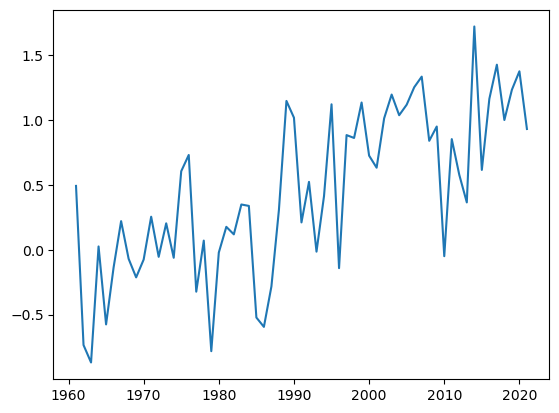

In [ ]:
plt.plot(pivot_df["Year"], pivot_df["United Kingdom"])
plt.show()

In [ ]:
pivot_df.columns

Index(['Year', 'Afghanistan, Islamic Rep. of', 'Albania', 'Algeria',
       'American Samoa', 'Andorra, Principality of', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina',
       ...
       'Vanuatu', 'Venezuela, Rep. Bolivariana de', 'Vietnam',
       'Wallis and Futuna Islands', 'West Bank and Gaza', 'Western Sahara',
       'World', 'Yemen, Rep. of', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=226)

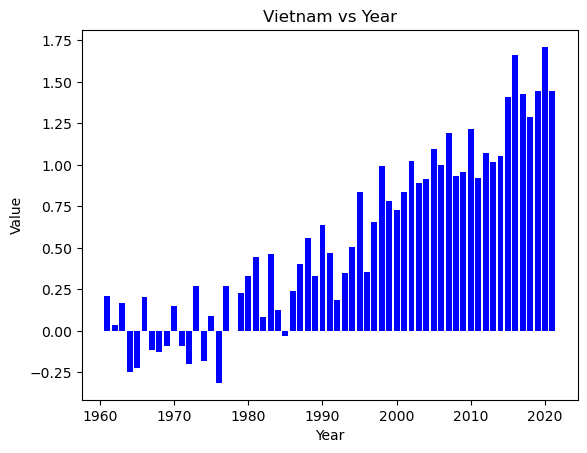

In [ ]:

# Plotting
plt.bar(pivot_df['Year'], pivot_df["World"], color='blue')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Vietnam vs Year')
plt.show()

In [ ]:
pivot_df.to_csv("../ShinyClimate/data/temperature.csv")

In [ ]:
df = pd.read_csv("../data/LandOceanTemperatureIndex.csv")
df.head()

,Year,No_smoothing,Lowess
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24


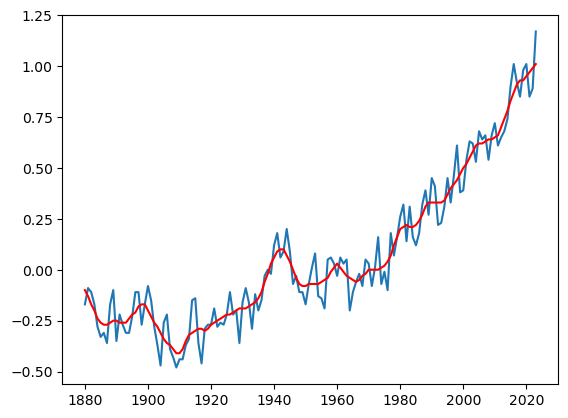

In [ ]:
plt.plot(df["Year"], df["No_smoothing"])
plt.plot(df["Year"], df["Lowess"], color="red")
plt.show()

In [ ]:
df.to_csv("../ShinyClimate/data/LandOceanTemperatureIndex.csv")

In [ ]:
df = pd.read_csv("../data/Change_in_Mean_Sea_Levels.csv")

In [ ]:
df.shape

(35604, 13)

In [ ]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,D12/17/1992,-10.34
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,D12/17/1992,-18.46
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,D12/17/1992,-15.41
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,D12/17/1992,196.85
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,D12/17/1992,3.27


In [ ]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Measure', 'Date',
       'Value'],
      dtype='object')

In [70]:
df = pd.read_csv("../data/Change_in_Mean_Sea_Levels.csv")
df = df.drop(columns=['ObjectId', 'Country', 'ISO2', 'ISO3',  'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'])


df_trends = df[df['Indicator'] == "Change in mean sea level: Sea level: Trend"]
df = df[df['Indicator'] != "Change in mean sea level: Sea level: Trend"]
replacements = {
    'Change in mean sea level: Sea level: TOPEX.Poseidon': "TOPEX",
    'Change in mean sea level: Sea level: Jason.1': "Jason.1",
    'Change in mean sea level: Sea level: Jason.2': "Jason.2",
    'Change in mean sea level: Sea level: Jason.3': "Jason.3",
}
df = df.replace(replacements)


df["Date"] = df["Date"].str[1:]
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# Extracting the year and day of the year
df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.dayofyear
# Calculating the decimal date
df['Decimal_Date'] = df['Year'] + df['DayOfYear'] / pd.to_datetime(df['Year'].astype(str) + '-12-31').dt.dayofyear

df = df.rename(columns={"Measure": "Ocean", "Indicator": "Satellite"})
# Drop unnecessary columns
df = df.drop(['Year', 'DayOfYear'], axis=1)
# df.to_csv("../ShinyClimate/data/Change_in_Mean_Sea_Levels.csv", index=False)

In [ ]:
oceanName = "Atlantic Ocean"
colors = {
    'TOPEX.Poseidon': 'red',
    'Jason.1': 'blue',
    'Jason.2': 'green',
    'Jason.3': 'yellow',
}
oc = df[df["Ocean"] == oceanName]
oc['Color'] = oc['Indicator'].map(colors)
plt.scatter(oc["Decimal_Date"], oc["Value"], c=oc['Color'], label=oc['Indicator'])

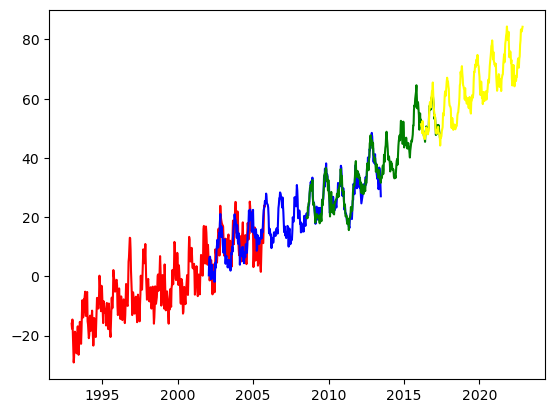

In [65]:
oceanName = "World"
colors = {
    'TOPEX.Poseidon': 'red',
    'Jason.1': 'blue',
    'Jason.2': 'green',
    'Jason.3': 'yellow',
}
sat = 'TOPEX.Poseidon'
df_topex = df[(df["Ocean"]==oceanName) & (df['Indicator'] == sat)]
plt.plot(df_topex['Decimal_Date'], df_topex["Value"], c = colors[sat])

sat = 'Jason.1'
df_topex = df[(df["Ocean"]==oceanName) & (df['Indicator'] == sat)]
plt.plot(df_topex['Decimal_Date'], df_topex["Value"], c = colors[sat])

sat = 'Jason.2'
df_topex = df[(df["Ocean"]==oceanName) & (df['Indicator'] == sat)]
plt.plot(df_topex['Decimal_Date'], df_topex["Value"], c = colors[sat])

sat = 'Jason.3'
df_topex = df[(df["Ocean"]==oceanName) & (df['Indicator'] == sat)]
plt.plot(df_topex['Decimal_Date'], df_topex["Value"], c = colors[sat])

In [6]:
df_trends.shape

(25, 4)

In [71]:
df_trends = df_trends.rename(columns={"Measure":"Ocean"})

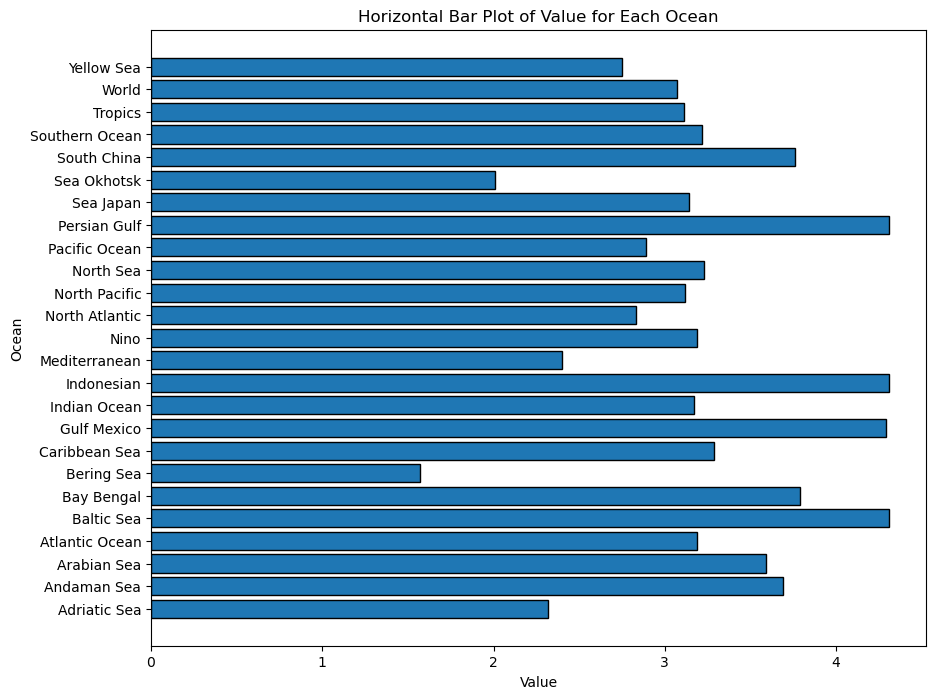

In [11]:
df = df_trends
plt.figure(figsize=(10, 8))
plt.barh(df['Ocean'], df['Value'], edgecolor='black')

plt.title('Horizontal Bar Plot of Value for Each Ocean')
plt.xlabel('Value')
plt.ylabel('Ocean')

plt.show()


In [12]:
df_trends.to_csv("../ShinyClimate/data/Mean_Sea_Levels_Trends.csv", index=False)